# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

# Taking Data

In [2]:
df1= pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

# Preprocessing and Data Visualization

In [3]:
df1.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df1.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
df1["length"] = df1["text"].apply(len)

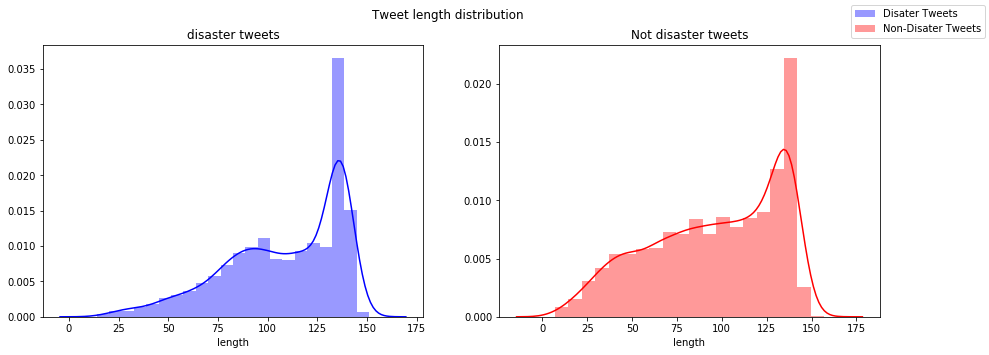

In [6]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df1[df1["target"] == 1]["length"],ax = ax1,label='Disater Tweets',color='blue').set(title = "disaster tweets")
sns.distplot(df1[df1["target"] == 0]["length"],ax = ax2,label='Non-Disater Tweets',color='red').set(title = "Not disaster tweets")
fig.suptitle('Tweet length distribution')
fig.legend(loc='upper right')
plt.show()

In [7]:
df1['words_count'] = df1['text'].str.split().map(lambda x: len(x))
df1.head()

,id,keyword,location,text,target,length,words_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16


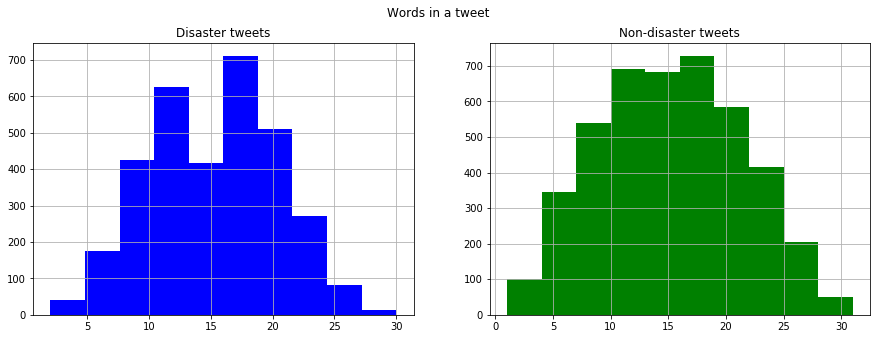

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
dis_tweet=df1[df1['target']==1]['words_count']
ax1.hist(dis_tweet,color='blue')
ax1.set_title('Disaster tweets')
ax1.grid()
nondis_tweet=df1[df1['target']==0]['words_count']
ax2.hist(nondis_tweet,color='green')
ax2.set_title('Non-disaster tweets')
ax2.grid()
fig.suptitle('Words in a tweet')
plt.show()

In [9]:
train_disaster = df1[df1['target'] == 1]

In [10]:
train_disaster

,id,keyword,location,text,target,length,words_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19


In [11]:
train_not_disater = df1[df1['target'] == 0]

In [12]:
train_not_disater

,id,keyword,location,text,target,length,words_count
15,23,NaN,NaN,What's up man?,0,14,3
16,24,NaN,NaN,I love fruits,0,13,3
17,25,NaN,NaN,Summer is lovely,0,16,3
18,26,NaN,NaN,My car is so fast,0,17,5
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,28,3
...,...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,104,13
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0,80,11
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0,127,13
7587,10841,NaN,NaN,Sirens everywhere!,0,18,2


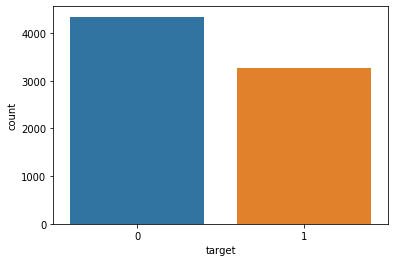

In [13]:
sns.countplot(df1['target'])

In [14]:
vectorizer = CountVectorizer()

In [15]:
train_disaster_countvectorizer = vectorizer.fit_transform(df1['text'])

In [16]:
train_disaster_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
label = df1['target']
label

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [18]:
df2.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [19]:
df2.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [20]:
test_disaster_countvectorizer = vectorizer.transform(df2['text'])

In [21]:
test_disaster_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Training with train data and evaluation with given test data

## Support Vector Machine

In [22]:
from sklearn.svm import SVC

In [23]:
model_svc=SVC(C=100,kernel='rbf')

In [24]:
model_svc.fit(train_disaster_countvectorizer, label)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
test_sample = test_disaster_countvectorizer.toarray()
test_sample

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
test_sample.shape

(3263, 21637)

In [27]:
prediction = model_svc.predict(test_sample)

In [28]:
prediction_df = pd.DataFrame(prediction, columns=['target'])

In [29]:
prediction_df

,target
0,1
1,1
2,1
3,0
4,1
...,...
3258,1
3259,1
3260,1
3261,1


In [30]:
predicted_result = pd.concat([df2['id'], prediction_df], axis=1)
predicted_result

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [31]:
predicted_result.isnull().sum()

id        0
target    0
dtype: int64

In [32]:
predicted_result['target'].value_counts()

0    2132
1    1131
Name: target, dtype: int64

In [33]:
predicted_result.to_csv('predicted_result.csv', index=False)

# Training and valuation with splitted train test data

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_disaster_countvectorizer, label, test_size=0.2)

## Support Vector Machine Classifier

In [35]:
model_svc.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
predictions_svc = model_svc.predict(x_test)

In [37]:
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       868
           1       0.81      0.69      0.75       655

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



## KNeighborsClassifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model_knc = KNeighborsClassifier()
model_knc.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
predictions_knc = model_knc.predict(x_test)

In [40]:
print(classification_report(y_test, predictions_knc))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       868
           1       0.86      0.36      0.51       655

    accuracy                           0.70      1523
   macro avg       0.76      0.66      0.64      1523
weighted avg       0.75      0.70      0.66      1523



## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
predictions_rfc = model_rfc.predict(x_test)

In [43]:
print(classification_report(y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       868
           1       0.87      0.62      0.72       655

    accuracy                           0.80      1523
   macro avg       0.82      0.77      0.78      1523
weighted avg       0.81      0.80      0.79      1523



## Multinomial Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB

model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
predictions_mnb = model_mnb.predict(x_test)

In [46]:
print(classification_report(y_test, predictions_mnb))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       868
           1       0.81      0.72      0.76       655

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.80      1523
weighted avg       0.80      0.80      0.80      1523

